In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

c:\Users\kongp\miniconda3\envs\tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Prepare Data

In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.head()

,Date,CustomerID,ProductID,Quantity,Price,Country
0,2023-12-14,80485,4438,10,71.31,United States Minor Outlying Islands
1,2023-09-05,28321,8080,5,71.92,Singapore
2,2023-07-19,35114,5442,9,42.65,Venezuela
3,2023-07-27,22083,3095,8,28.82,Turkey
4,2023-11-23,1161,3817,8,22.68,Iran


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        500 non-null    object 
 1   CustomerID  500 non-null    int64  
 2   ProductID   500 non-null    int64  
 3   Quantity    500 non-null    int64  
 4   Price       500 non-null    float64
 5   Country     500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [5]:
#missing value
df.isnull().sum()

Date          0
CustomerID    0
ProductID     0
Quantity      0
Price         0
Country       0
dtype: int64

In [6]:
#convert column obj to date_time
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        500 non-null    datetime64[ns]
 1   CustomerID  500 non-null    int64         
 2   ProductID   500 non-null    int64         
 3   Quantity    500 non-null    int64         
 4   Price       500 non-null    float64       
 5   Country     500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 23.6+ KB


In [8]:
stat = df[['Quantity', 'Price']]
print(stat)

     Quantity  Price
0          10  71.31
1           5  71.92
2           9  42.65
3           8  28.82
4           8  22.68
..        ...    ...
495         8  56.09
496         2  89.69
497         8  63.39
498         1  30.89
499         6  97.26

[500 rows x 2 columns]


In [9]:
stat2 = df[['Quantity', 'Price']].describe()
print(stat2)

         Quantity       Price
count  500.000000  500.000000
mean     5.498000   55.553500
std      2.862584   26.372674
min      1.000000   10.020000
25%      3.000000   33.220000
50%      6.000000   56.585000
75%      8.000000   77.247500
max     10.000000   99.960000


In [10]:
df['Revenue'] = df['Quantity'] * df['Price']

In [11]:
df = df[['Date', 'CustomerID', 'ProductID', 'Quantity','Price','Revenue','Country']]

In [12]:
df.head()

,Date,CustomerID,ProductID,Quantity,Price,Revenue,Country
0,2023-12-14,80485,4438,10,71.31,713.10,United States Minor Outlying Islands
1,2023-09-05,28321,8080,5,71.92,359.60,Singapore
2,2023-07-19,35114,5442,9,42.65,383.85,Venezuela
3,2023-07-27,22083,3095,8,28.82,230.56,Turkey
4,2023-11-23,1161,3817,8,22.68,181.44,Iran


### Data Visualization

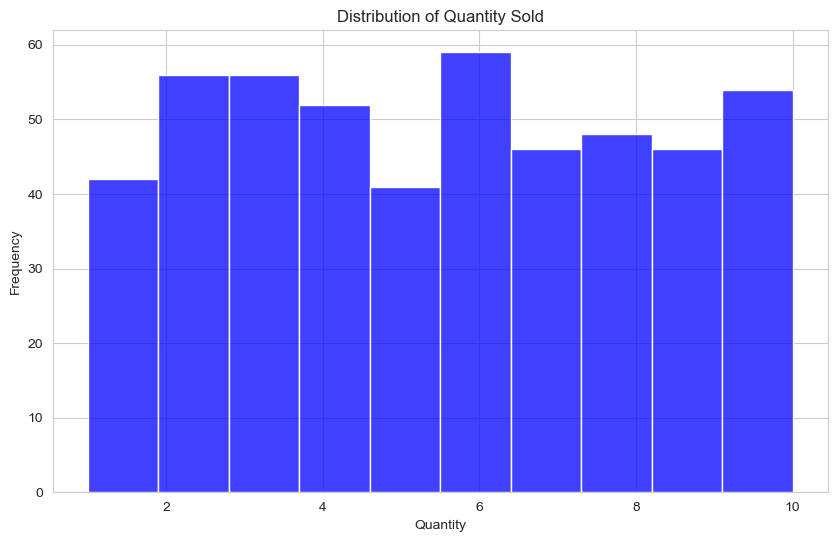

In [14]:
plt.figure(figsize = (10,6))
sns.histplot(df['Quantity'], color = 'b')
plt.title("Distribution of Quantity Sold")
plt.xlabel('Quantity', size = 10)
plt.ylabel('Frequency', size = 10)
plt.show()

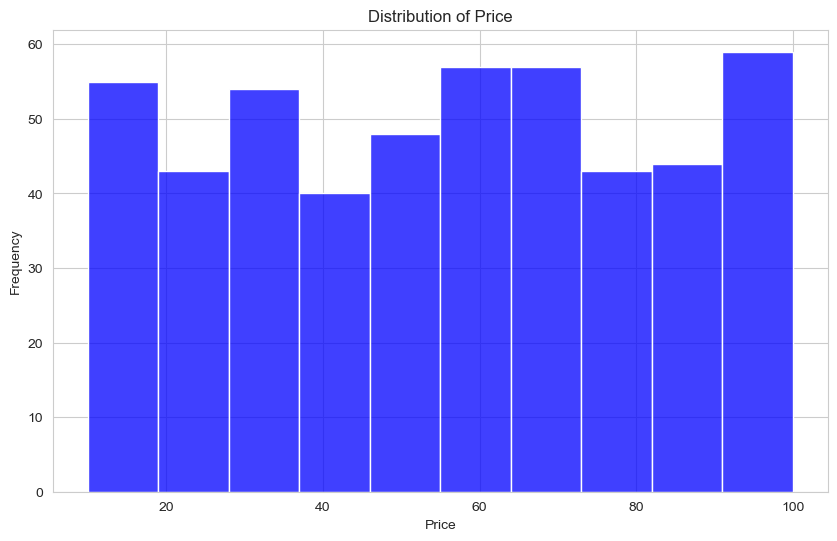

In [15]:
plt.figure(figsize = (10,6))
sns.histplot(df['Price'], color = 'b')
plt.title("Distribution of Price")
plt.xlabel('Price', size = 10)
plt.ylabel('Frequency', size = 10)
plt.show()

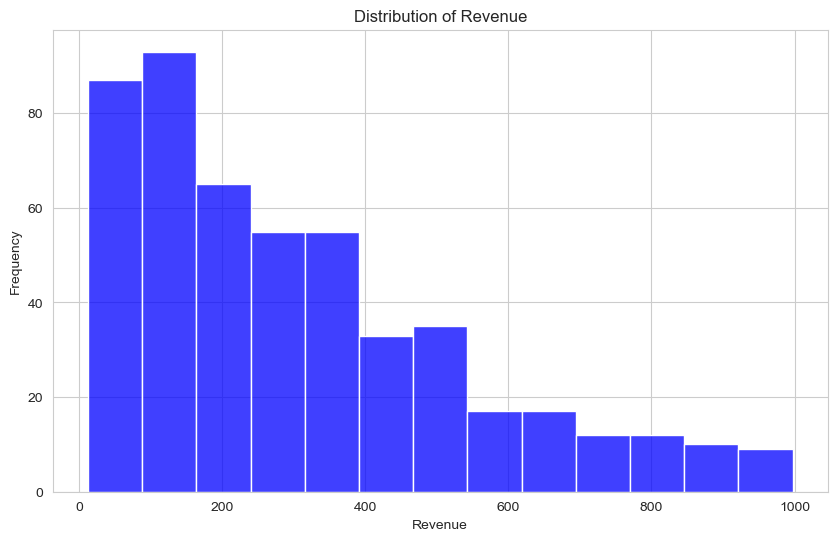

In [16]:
plt.figure(figsize = (10,6))
sns.histplot(df['Revenue'], color = 'b')
plt.title("Distribution of Revenue")
plt.xlabel('Revenue', size = 10)
plt.ylabel('Frequency', size = 10)
plt.show()

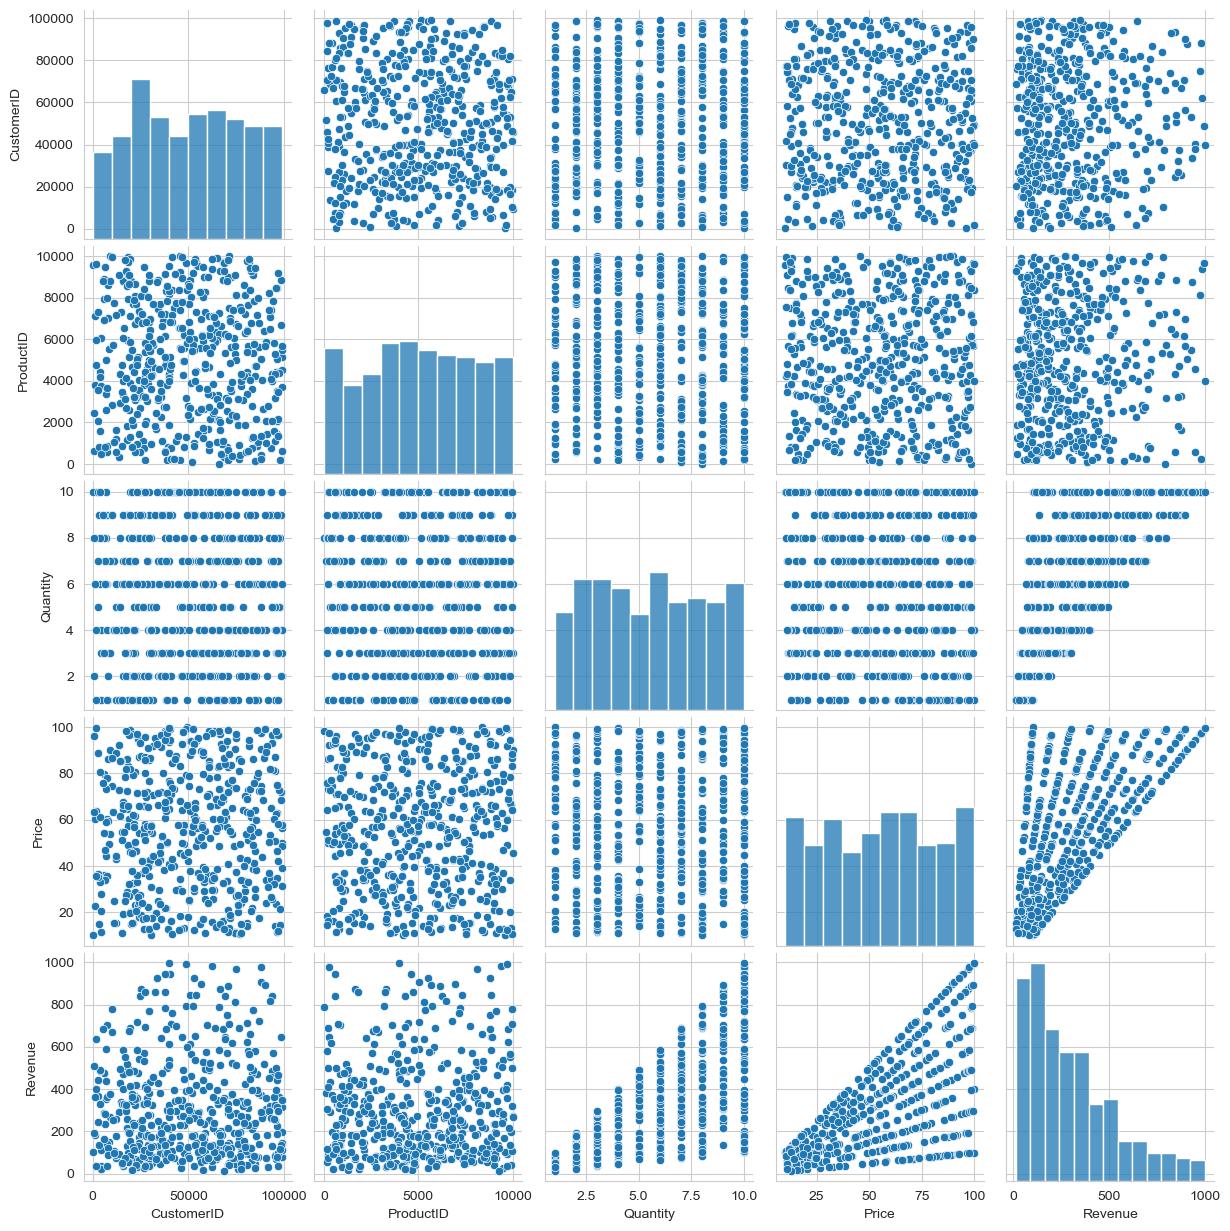

In [17]:
sns.pairplot(df)


C:\Users\kongp\AppData\Local\Temp\ipykernel_22068\2285951095.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Revenue', y = 'Price', data = df, palette = "Dark2")


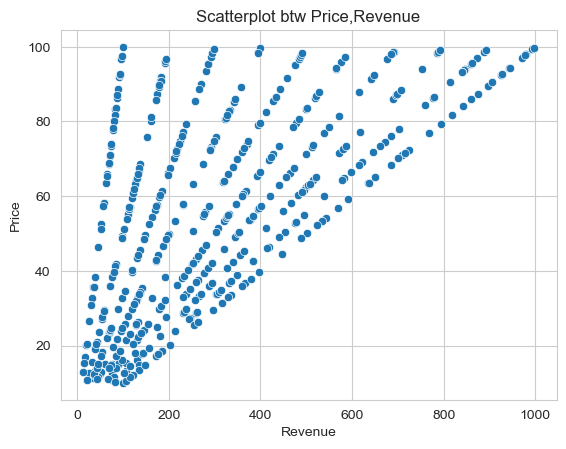

In [18]:
sns.scatterplot(x = 'Revenue', y = 'Price', data = df, palette = "Dark2")
plt.title("Scatterplot btw Price,Revenue")
plt.show()

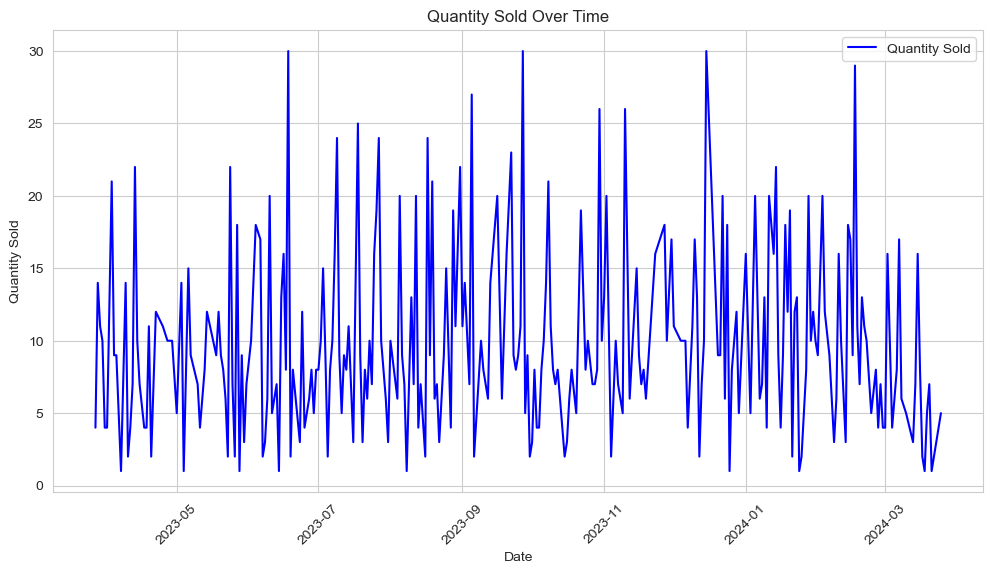

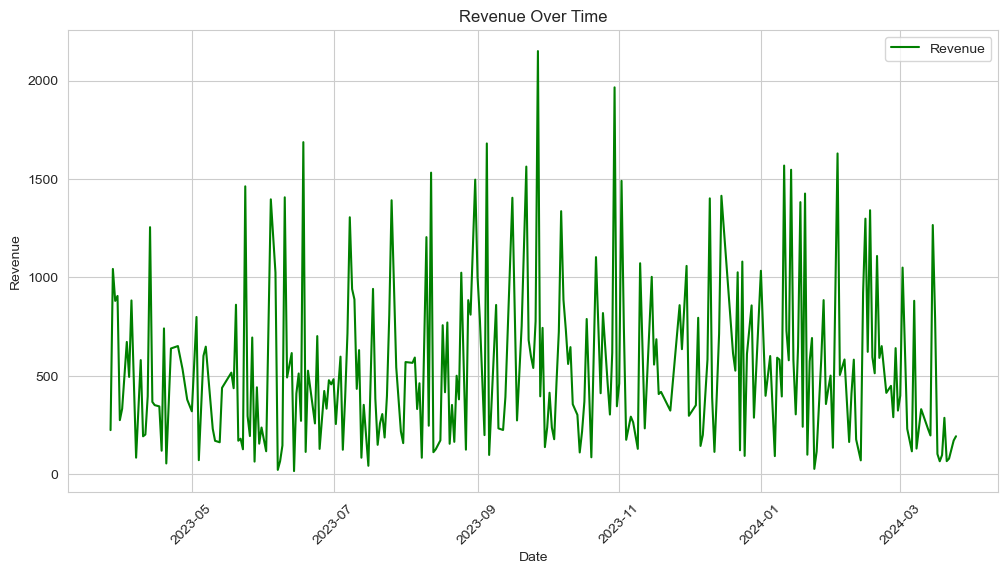

In [19]:
#summary data
sales_per_day = df.groupby(df['Date'])['Quantity'].sum()
revenue_per_day = df.groupby(df['Date'])['Revenue'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_per_day.index, y=sales_per_day.values, color='blue', label='Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_per_day.index, y=revenue_per_day.values, color='green', label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()


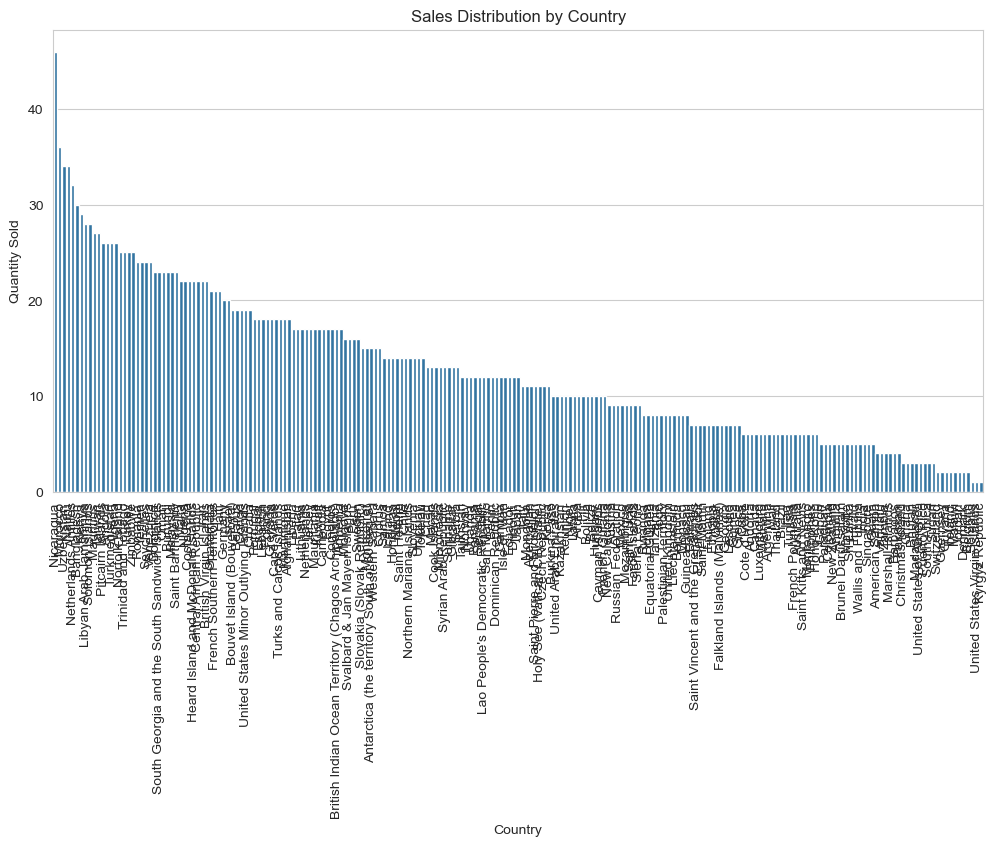

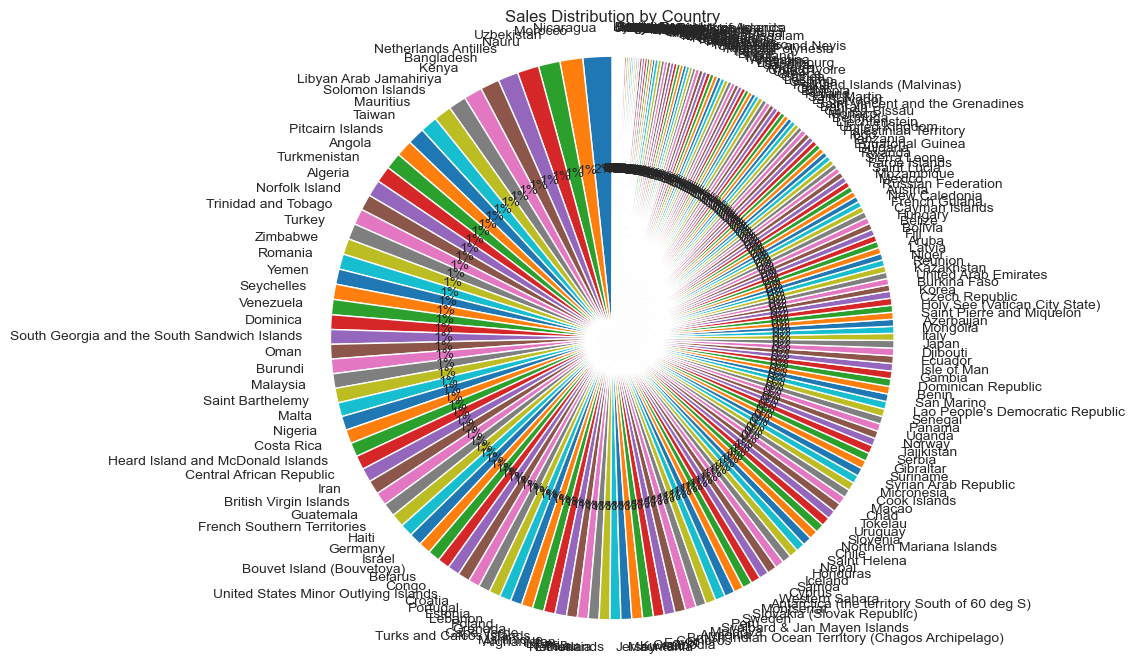

In [20]:
#summary data
sales_per_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
#barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_per_country.index, y=sales_per_country.values)
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()
#piechart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_country.values, labels=sales_per_country.index, autopct='%.0f%%', startangle=90)
plt.title('Sales Distribution by Country')
plt.axis('equal')  
plt.show()

In [21]:
#Calculate and display other interesting statistics you can find in the dataset.
top_country = sales_per_country.idxmax()
print(f"Country with highest sales: {top_country}")
max_sales_day = sales_per_day.idxmax()
print(f"Day with highest sales: {max_sales_day}")
total_revenue = df['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")

Country with highest sales: Nicaragua
Day with highest sales: 2023-06-18 00:00:00
Total Revenue: 152310.91999999998
